In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline 

mnist_dataset = tf.keras.datasets.mnist # Датасет из изображений цифр размером 28x28.

# Загружаем обучающую(x_train, y_train) и тестовую(x_test, y_test) выборки.
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data() 
print(x_train.shape)

# Нормализуем обучающую выборку. Значения интенсивности пикселя нормализуются до пределова от [0, 1] 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28)


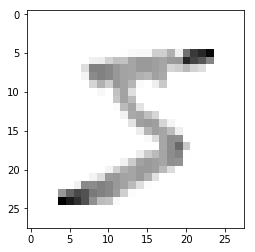

In [3]:
plt.imshow(x_train[0], cmap=plt.cm.binary) 

In [4]:
print(y_train[0]) # Убедимся, что в y_train находятся классы объектов обучающей выборки

5


In [5]:
# Создадим непосредственно модель
model = tf.keras.models.Sequential()
# Добавляем слои к нашей нейронной сети 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Компилируем модель(собираем)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Непосредственно обучение нейронной сети на обучающей выборке
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 128us/step - loss: 0.2656 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 5s 90us/step - loss: 0.1070 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 5s 91us/step - loss: 0.0738 - acc: 0.9766


In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/step


In [7]:
# Делаем предсказывания.
predictions = model.predict([x_test])

7


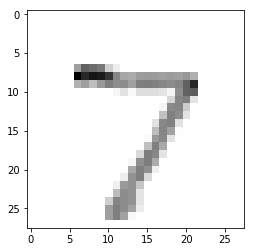

In [8]:
# Убедимся, что предсказания верны
# Выводим изображение
plt.imshow(x_test[0], cmap=plt.cm.binary)
# Выводим предсказание к этому изображению
print(np.argmax(predictions[0]))

2


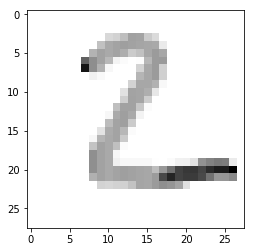

In [9]:
plt.imshow(x_test[1], cmap=plt.cm.binary)
print(np.argmax(predictions[1]))